# **Intro to Machine learning**

# i) What is machine learning
 - sub-set of AI that enable systems to learn patterns from data & make predictions or decsions without explicit programming.

 ### Types of Machine learning
 - Supervised learning - the model learn's from labeled data e.g (classification, regression).
 - Unsupervised learning - the model learns patterns from unlabeled data e.g(clustering, dimensitionality reduction).
 - Re-enforcement learning - the model learns through rewards & penalties in an environment.

 ### ii) Real world application of ML
 - Image recognision(face id, medical imaging).
 - Natural language processing(chart bots, centiment analysis).
 - Recommendation systems (Netflix, Amazon, Spotify).
 - Fraud detection(credit card fraud, cyber security).


## Data pre-processing and exploration
### Data cleaning
- Handling missing values (mean/mode impitation, dropping)
- Removing duplicates and inconsistencies.
- Converting categorical variable into numerical format.
- One-hot encoding, label encoding.
### Feature enginering
- Creating new features from existing data.
- Normalization Vs standardization.


### Explorarory data analysis (EDA)
- Summary statistic (mean, median, variance).
- Visualization (boxplot, scatter plot).
- Identifying correlations (pearson's correlation).


## Supervised Learning
- Type of ML where the algorithm is trained on labeled data. This means each training example has an input (features) & a known output labeled/target.
- The model learns the relationship btw input & output to make predictions on unseen data.

### Type of Supervised learning
- Regression(continues output) :
used when the target variable is numerical or continues eg (predicting house prices).
#### common algorithms for regression;
* Linear rregression
* polynomial regression
* Desicion tree regression
* Random forest regression
* Suport vector regression

#### Model evaluation metrics
 - Mean square error(MSE)
 - Root mean square error(RME)
 - R^2 score

 ### Training process in supervised learning
 1) Collect & process data(handling missing values, encode categorical variables, normalize features)
 2) Split data into training & testing sets(typicaly 70% to 80 %, 20% to 30% testing)
 3) Chose a suitable model based on the problem type(classification or regression).
 4) Train the model by feeding it input-output pairs & optimazing weights.
 5) Evaluate model performance using metrics (accuracy, RMSE, precision)
 6) Tune hyper parameters to improve model performance.
 7) Deploy the model & monitor its real world performance.


# Regression
## Hands on implimentation in Python

#### Boston Housing dataset description
The Boston housing dataset is a classic dataset in ML used for regression tasks.
It contains 506 observations/rows & 14 variable/features/columns, including information about housing prices in various neighbourhood in Boston.

#### Purpose of using this dataset.
We will use linear regression to predict prices(MEDV based on these features).
The goal is to;
- Understand how different factors(eg crime rate,number of rooms, & tax rates influence housing prices).
- Build a linear regression model to predict house prices given neighbourhood x-tics.
- Evaluate the models accuracy using mean square error & R^2 score.
- Visualize actual vs predicted house prices to access model performance.

In [35]:
# Importing libraries
import pandas as pd
import numpy as np

In [36]:
# Reading data into python
boston= pd.read_csv("boston.csv")

In [37]:
# viewing the head
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
# Viewing tail
boston.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [39]:
# The code boston.info() provides a summary of the DataFrame boston, including:
#Number of entries (rows) and columns
#Column names and data types (int64, float64, object, etc.)
#Number of non-null values in each column
#Memory usage of the DataFrame

boston.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [40]:
# checking the summary statistics for the data set
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
# checking for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Linear Regresion

In [42]:
# defining x(features) & y(target)
# dropping the target variable
X=boston.drop("MEDV", axis=1)
# the target variable
y=boston["MEDV"]

## Splitting the data set into training & testing


In [43]:
from sklearn.model_selection import train_test_split
#
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (404, 13)
Testing data: (102, 13)


In [44]:
# importing linear regression library
from sklearn.linear_model import LinearRegression

In [45]:
# intialize the mode
model=LinearRegression()

# fit/train the model
model.fit(X_train, y_train)

LinearRegression()

### Making predictions
After training the model we now make predictions

In [46]:
# prediction on test set
y_pred=model.predict(X_test)

# comparing actual vs predicted
comparison=pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
print(comparison.head())

     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


### Evaluating the model
To measure performance we use MSE, RMSE R^2 score

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred)
rmse=mse**0.5
r2=r2_score(y_test, y_pred)
print(f"Mean squared error(MSE):{mse:2f}")
print(f"Root mean squared error(RMSE):{rmse:2f}")
print(f"R^2 score:{r2:2f}")



Mean squared error(MSE):24.291119
Root mean squared error(RMSE):4.928602
R^2 score:0.668759


### Evaluating model performance
1. Mean squared error(MSE):24.291119
- Measures the average squared difference btw the actual & predicted prices.
- Lower is better since the target(MEDV)is in thousands, this means the average squared error is around 24290.

2. Root mean squared error(RMSE):4.928602
- RMSE is the square roor of MSE making it easy to interprete.
- the typical prediction error is around 4930.
3. R^2 score:0.668759
- This indicate how much variance in the house prices is explained by our model.
- R^2= 0.67 means 67% of the price variation is explained by the features.
- A perfect model would have R^2=1.0 but for real world data 0.67 is decsent but not great.

### Visualizing the prediction
A scatter plot help compare actual vs predicted prices

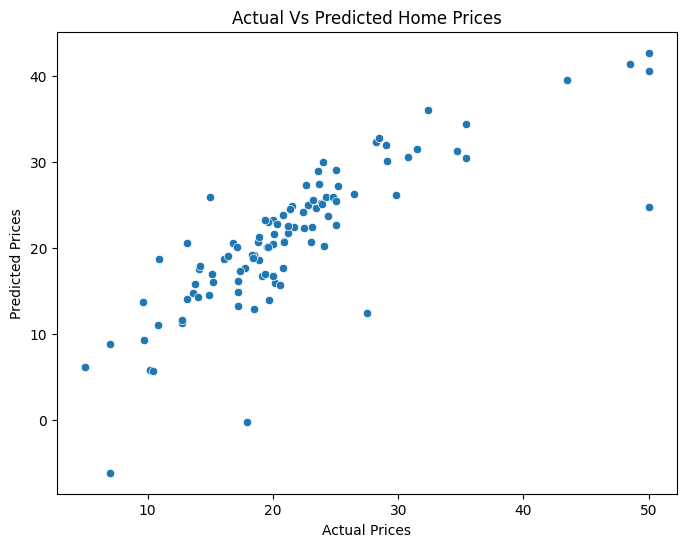

In [48]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# plottingn the visual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Home Prices")
plt.show()

###  Analysis of the Scatter plot (Actual Vs Predicted Price)
 This plot compares the actual home prices(x-axis) with the predicted prices (y-axis) from our linear regression model.
#### Observations
- Strong positive correlation - the point generaly follow a diagonal trend indicating our model captures the overal pattern well.
- Some spreed - there is some diveassion from the peffect diagonal line(y=x) meaniung our model as some error.
- Outliers - a few points are significantly off particularly some predicted values that are much lower o0r higher than expected.


### Residual plot to check bairsness

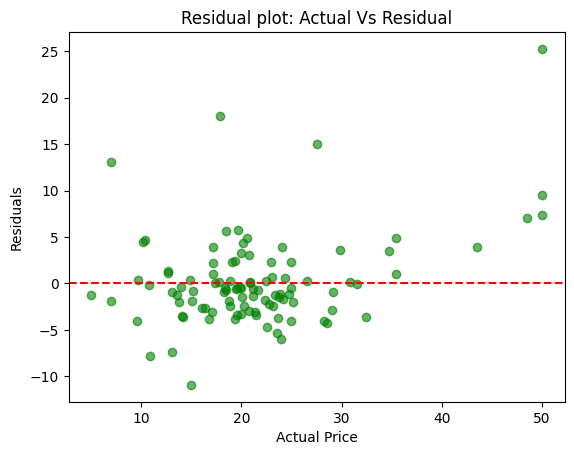

In [49]:
# calculating residual
residuals = y_test - y_pred
# plot residual
plt.Figure(figsize=(8,5))
plt.scatter(y_test, residuals, color="green", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.5)
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual plot: Actual Vs Residual")
plt.show()


### interpretation
Scattered residuals around zero- this suggest that the linear regression model  captures the general trend well.

## Polynomial Regression
This is an externsion of Linear regression that captures non-linearity by adding polynomial terms to the model.
#### We will follw these steps
- Step 1: Transform features by adding polynomial terms.
- Step 2: Fit the model using polynomial regression.
- Step 3: Evaluate the model using MSE, RMSE, R2
- Step 4: Visualize Actual Vs Predicted Prices and Actual

#### Step 1: Transforming features by adding polynomial terms

In [50]:
# loading libraries for transformation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
#defining polynomial degree
degree = 2

# creating polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Creating pipeline: polynomial transformation + linear regression
model= make_pipeline(poly_features, LinearRegression())



### Step 2: Fit the model using polynomial Regression and then predicting

In [52]:
# Training\ fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred_poly=model.predict(X_test)

### Step 3: Evaluating the model using MSE,RMSE * R2

In [53]:
mse_poly=mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (Degree={degree}) Results:")
print(f"mean_squared_error(mse):{mse_poly: .2f}")
print(f"root_mean_square_error(rmse):{rmse_poly: .2}")
print(f"r2score:{r2_poly: .2}")

Polynomial Regression (Degree=2) Results:
mean_squared_error(mse): 14.26
root_mean_square_error(rmse): 3.8
r2score: 0.81


### Comparing this to the Linear Regression Result
- MSE dropped from 24.29 to 14.26 (lower MSE is better)
- RMSE dropped form 4.93 to 3.78 (lower RMSE is better)
- R2 increased from 0.67 to 0.81 (closer to 1.0 is better)
- This suggest that polynomial regression (degree=2) fits the data better than simple linear regression


### Step 4: Visualizing Actual Vs Predicted Prices

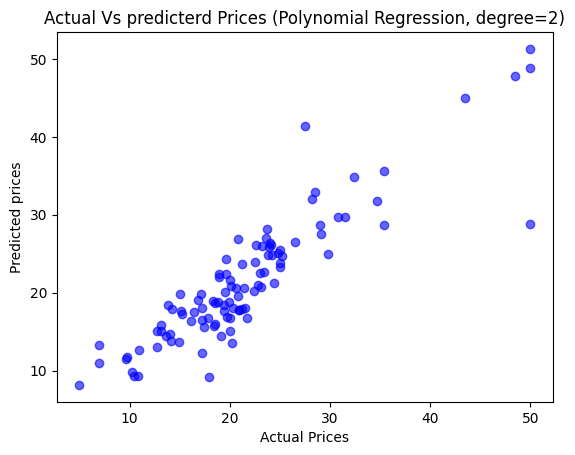

In [54]:
# plot Actual Vs Predicted Prices
plt.scatter(y_test, y_pred_poly, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title(f"Actual Vs predicterd Prices (Polynomial Regression, degree={degree})")
plt.show()


### Step 5: VIsualizing Residual

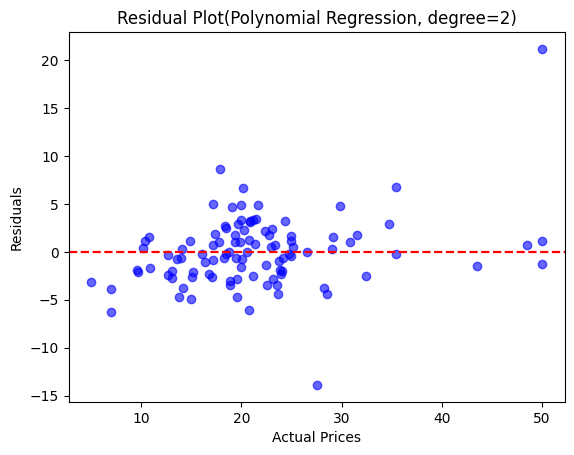

In [55]:
# ploting Residual
residuals_poly= y_test - y_pred_poly
plt.scatter(y_test, residuals_poly, color = "blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.6)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title(f"Residual Plot(Polynomial Regression, degree={degree})")
plt.show()


### Interpretation
- The residuals looks more centered around zero indicating that the polynomial model is capturing some non-linearity in the data.

## Random Forest
### Train the Random Forest Model
- Import RandomForestClassifier (for classification) or RandomForestRegressor (for regression).

- Set hyperparameters (e.g., number of trees, max depth).

- Train the model on the training set.

### Make Predictions
- Use the trained model to make predictions on the test set.

### Evaluate the Model
- For classification: Use accuracy, precision, recall, F1-score, and ROC-AUC.

- For regression: Use RMSE, R² score, and MAE.

### Hyperparameter Tuning (Optional)
- Optimize parameters using Grid Search or Random Search to improve performance.

In [56]:
# Performing random forest modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [57]:
# Model training
viva = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
viva.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [58]:
# Making Predictions
y_pred_forest = viva.predict(X_test)

In [59]:
# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_forest)  # Calculate MSE
rmse_rf = mse_rf**0.5                        # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_forest)             # Calculate R2

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Regression Results:
Mean Squared Error (MSE): 7.76
Root Mean Squared Error (RMSE): 2.79
R-squared (R2): 0.89


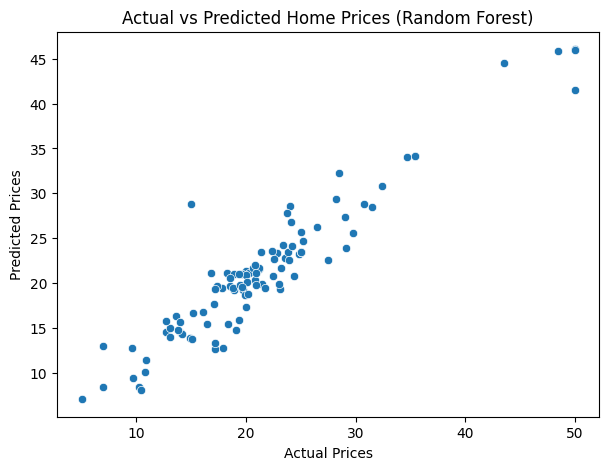

In [60]:
# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(7,5))
# Create scatter plot
sns.scatterplot(x=y_test, y=y_pred_forest)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices (Random Forest)")
plt.show()

# Assignment plotting residuals for Random Forest

## Descision Tree Regression


In [61]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Intialize Decision Tree Regressor
dt_regressor =DecisionTreeRegressor(random_state=42)

#### Training the model

In [63]:
# training the dt model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
# predicting the model
y_pred_dt = dt_regressor.predict(X_test)

#### Model evaluation

In [65]:
mse_dt= mean_squared_error(y_test, y_pred_dt)
rmse_dt= np.sqrt(mse_dt)
r2_dt= r2_score(y_test, y_pred_dt)

print(f"Desicion Tree Regression (MSE):{mse_dt: .2f}")
print(f"Desicion Tree Regression (RMSE):{rmse_dt: .2f}")
print(f"R2 Score(R2):{r2_dt: .2f}")



Desicion Tree Regression (MSE): 10.42
Desicion Tree Regression (RMSE): 3.23
R2 Score(R2): 0.86


### Visualizing decision tree

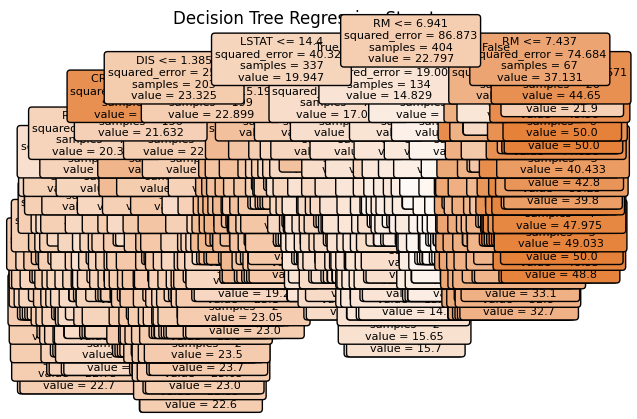

In [66]:
from sklearn.tree import plot_tree
plt.Figure(figsize=(15,8))
plot_tree(dt_regressor, filled=True, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.title("Decision Tree Regression Structure")
plt.show()

### Decision Tree Regression Interpretation
- Tree complexity: The decisiion tree is deep indicating it may be over fitting to the training data.
- Feature importance: key predictors include LSTAT(lower income %, ) RM(number of rooms), CRIM (crime rate) are all strong indicators of housing prices
- Splitting criteria: The model makes decisions at different feature thresh hold, spliting the data to minimize the variance and error.
- Overfitting risk : many leaf notes containing very few samples suggesting the model maybe memorizing rather than generalizing.
- Next steps : consider pronning or using random forest for improved generalization & stability 

## Key observations
### 1. Random Forest as a lower MSE & RMSE
- MSE(7.90 Vs 10.42): random forest makes smaller error that decision tree.
- RMSE (2.81 Vs 3.23): Predictions from Random forest have a lower average error.

### 2. Random Forest as a higher R2 score (0.89 Vs 0.86)
- It explains 89% of the variance compaired to the 86% for decision tree.
- A higher R2 score means Random forest captures patterns in the data better.

### 3. Why is Random forest better?
- reducess over fiTting: decision tree often over fit the training data capturing noise instead of patterns. Random forest averages multiple trees making it more robust & generalizeable.
-Better performance: combining miultiple trees allows random forest to make more accurate decision than a singlr decision tree.

## Conclussion
- Random forest regression out performs decision regression in this dataset.
- It has lower errors (MSE & RMSE) and higher predictive power (R2 score)
- If computation cost is not an issue, Random forest is the better choice for regression task.

### Ploting Residual for Decision Tree


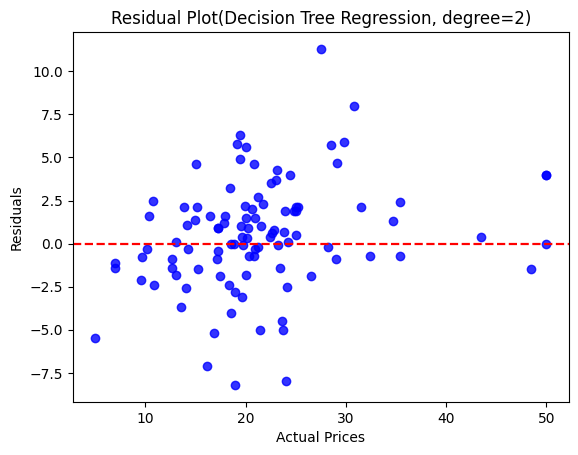

In [67]:
# ploting Residual
residuals_dt= y_test -  y_pred_dt
plt.scatter(y_test, residuals_dt, color = "blue", alpha=0.8)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.6)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title(f"Residual Plot(Decision Tree Regression, degree={degree})")
plt.show()
